In [275]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import seaborn as sns
import pandas as pd

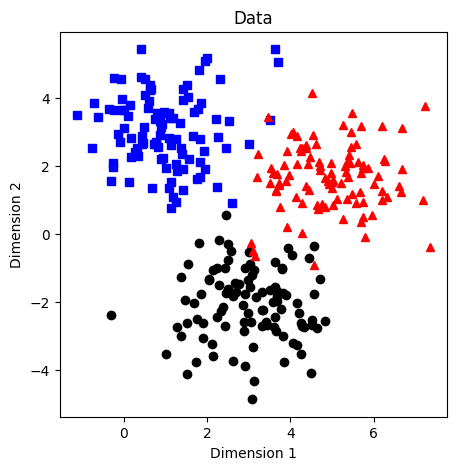

In [276]:
nPerClust = 100
blur = 1

A = [ 1, 3 ]
B = [ 3, -2 ]
C = [ 5, 2 ]

a = [ A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur, C[1]+np.random.randn(nPerClust)*blur ]

labels_np = np.vstack((np.zeros((nPerClust,1)), np.ones((nPerClust,1)), 2*np.ones((nPerClust,1))))
data_np = np.hstack((a,b,c)).T

data = torch.tensor( data_np[:,] ).float()
labels = torch.tensor(labels_np).float()

fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1], 'bs')
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1], 'ko')
plt.plot(data[np.where(labels==2)[0],0], data[np.where(labels==2)[0],1], 'r^')
plt.title('Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [277]:
labels = labels.squeeze()

ANNclassifier = nn.Sequential(
    nn.Linear(2,4),
    nn.ReLU(),
    nn.Linear(4,3),
)

lossfn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(ANNclassifier.parameters(), lr=0.01)

In [278]:
Nepochs = 1000
losses = torch.zeros(Nepochs)
ongoingAcc = []

for epoch in range(Nepochs):
    yHat = ANNclassifier(data)
    loss = lossfn(yHat, labels.long())
    losses[epoch] = loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    matches = torch.argmax(yHat,axis=1) == labels
    matchesNum = matches.float()
    accPct = 100*torch.mean(matchesNum)
    ongoingAcc.append( accPct.item() )

sm = nn.Softmax(dim=1)
predic = sm(ANNclassifier(data))
predicLabels = torch.argmax(predic,axis=1)
totalAcc = 100*torch.mean(( predicLabels == labels ).float())

Text(0.5, 1.0, 'Training Accuracy: 96.67')

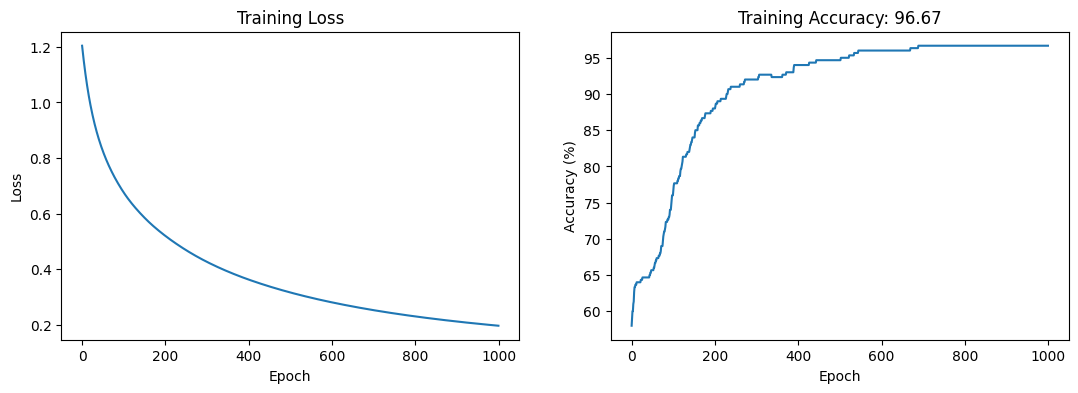

In [279]:
fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_title('Training Loss')

ax[1].plot(ongoingAcc)
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_xlabel('Epoch')
ax[1].set_title('Training Accuracy: %.2f' % totalAcc)

In [280]:
torch.sum(sm(predic),axis=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

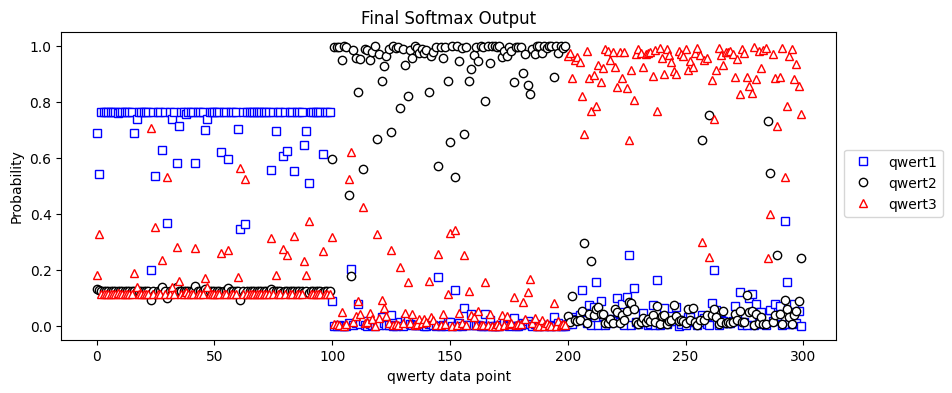

In [281]:
fig = plt.figure(figsize=(10,4))
sm = nn.Softmax(dim=1)

colorshape = [ 'bs', 'ko', 'r^' ]
for i in range(3):
    plt.plot(predic[:,i].detach(), colorshape[i], markerfacecolor='w')
plt.legend(['qwert1','qwert2','qwert3'],loc=(1.01,0.4))
plt.ylabel('Probability')
plt.xlabel('qwerty data point')
plt.title('Final Softmax Output')
plt.show()